<a href="https://colab.research.google.com/github/Premjit1/demo2/blob/main/01_PPC_Analysis_Ad_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:


#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2,style='darkgrid')


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import files
files.upload()

Saving 1. Ad Group & Headline.csv to 1. Ad Group & Headline (1).csv


{'1. Ad Group & Headline.csv': b'1. Ad Group & Headline,,,,,,,,,,,\r\n"August 29, 2019 - February 29, 2020",,,,,,,,,,,\r\nAd group,Headline 1,Campaign type,Search keyword match type,Currency,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost\r\nFranchise in Pune,Franchise Opportunity in Pune,Search Only,Exact,INR,"1,940",303,15.62%,25.76,11,3.63%,"7,805.57"\r\nFranchise in Pune,Number 1 Franchise Opportunity,Search Only,Phrase,INR,"1,152",168,14.58%,41.44,8,4.76%,"6,962.74"\r\nFranchise in Pune,Min. Investment & Max. Profit,Search Only,Phrase,INR,191,24,12.57%,36.72,1,4.17%,881.34\r\nFranchise in Pune,Profitable Franchise in Pune,Search Only,Broad,INR,412,60,14.56%,27.87,0,0.00%,"1,671.91"\r\nFranchise in Pune,Own Franchise in Maharashtra,Search Only,Phrase,INR,111,15,13.51%,37.48,0,0.00%,562.15\r\nFranchise in Pune,Franchise Opportunity @Mumbai,Search Only,Phrase,INR,42,4,9.52%,44.04,1,25.00%,176.16\r\nFranchise in Pune,Profitable Franchise in Mumbai,Search Only,Phrase,INR,32

In [5]:
#change display into using full screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
#import .csv file
data = pd.read_csv('1. Ad Group & Headline.csv',skiprows=2)

# 1. Data Exploration & Cleaning

## 1. Have a first look at data

In [7]:
data.head()

,Ad group,Headline 1,Campaign type,Search keyword match type,Currency,Impressions,Clicks,CTR,Avg. CPC,Conversions,Conv. rate,Cost
0,Franchise in Pune,Franchise Opportunity in Pune,Search Only,Exact,INR,"1,940",303,15.62%,25.76,11,3.63%,"7,805.57"
1,Franchise in Pune,Number 1 Franchise Opportunity,Search Only,Phrase,INR,"1,152",168,14.58%,41.44,8,4.76%,"6,962.74"
2,Franchise in Pune,Min. Investment & Max. Profit,Search Only,Phrase,INR,191,24,12.57%,36.72,1,4.17%,881.34
3,Franchise in Pune,Profitable Franchise in Pune,Search Only,Broad,INR,412,60,14.56%,27.87,0,0.00%,"1,671.91"
4,Franchise in Pune,Own Franchise in Maharashtra,Search Only,Phrase,INR,111,15,13.51%,37.48,0,0.00%,562.15


In [8]:
data.shape

(35, 12)

## 2. Check Data Types and Missing Values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ad group                   35 non-null     object 
 1   Headline 1                 35 non-null     object 
 2   Campaign type              35 non-null     object 
 3   Search keyword match type  35 non-null     object 
 4   Currency                   35 non-null     object 
 5   Impressions                35 non-null     object 
 6   Clicks                     35 non-null     int64  
 7   CTR                        35 non-null     object 
 8   Avg. CPC                   35 non-null     float64
 9   Conversions                35 non-null     int64  
 10  Conv. rate                 35 non-null     object 
 11  Cost                       35 non-null     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.4+ KB


### From the above results we can see some discrepancy in data.

- **1. CTR:** - is categorised as object, but we know it should be a number. This happened because a %age sign have come into the data. So python thinks it is a string. We can see this in the first output.
- **2. Conv. rate:** - same case as CTR.
- **3. Impressions, Cost:** - is categorised as object, but we know it should be a number. This happens because a comma must have come into the data. So python thinks it is a string


In [10]:
#Remove comma from Impressions and convert it to numeric data format
data['Impressions'] = data['Impressions'].str.replace(',', '')
data['Impressions'] = pd.to_numeric(data['Impressions'])

In [11]:
#Remove comma from cost and convert it to numeric data format
# Also apply a filter to consider only those records where cost > 0

data['Cost'] = data['Cost'].str.replace(',', '')
data['Cost'] = pd.to_numeric(data['Cost'])
data = data[(data['Cost'] > 0.0)]

In [ ]:
data.info()

So **Impressions** and **Cost** is sorted. Let's work on **CTR and Conv. rate** to remove the **%age** sign

In [12]:
data['CTR'] = data['CTR'].str.rstrip('%').astype('float')
data['CVR'] = data['Conv. rate'].str.rstrip('%').astype('float')
data.drop(['Conv. rate'],axis=1, inplace = True)

In [13]:
data.head()

,Ad group,Headline 1,Campaign type,Search keyword match type,Currency,Impressions,Clicks,CTR,Avg. CPC,Conversions,Cost,CVR
0,Franchise in Pune,Franchise Opportunity in Pune,Search Only,Exact,INR,1940,303,15.62,25.76,11,7805.57,3.63
1,Franchise in Pune,Number 1 Franchise Opportunity,Search Only,Phrase,INR,1152,168,14.58,41.44,8,6962.74,4.76
2,Franchise in Pune,Min. Investment & Max. Profit,Search Only,Phrase,INR,191,24,12.57,36.72,1,881.34,4.17
3,Franchise in Pune,Profitable Franchise in Pune,Search Only,Broad,INR,412,60,14.56,27.87,0,1671.91,0.00
4,Franchise in Pune,Own Franchise in Maharashtra,Search Only,Phrase,INR,111,15,13.51,37.48,0,562.15,0.00


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ad group                   23 non-null     object 
 1   Headline 1                 23 non-null     object 
 2   Campaign type              23 non-null     object 
 3   Search keyword match type  23 non-null     object 
 4   Currency                   23 non-null     object 
 5   Impressions                23 non-null     int64  
 6   Clicks                     23 non-null     int64  
 7   CTR                        23 non-null     float64
 8   Avg. CPC                   23 non-null     float64
 9   Conversions                23 non-null     int64  
 10  Cost                       23 non-null     float64
 11  CVR                        23 non-null     float64
dtypes: float64(4), int64(3), object(5)
memory usage: 2.3+ KB


## 3. Drop Columns that are extra

In [15]:
data['Currency'].value_counts()

INR    23
Name: Currency, dtype: int64

In [16]:
#We see that Currency is an additional column which we don't require. So we drop it
data.drop(['Currency'],axis=1, inplace = True)

In [17]:
#look at the data again
data.head()

,Ad group,Headline 1,Campaign type,Search keyword match type,Impressions,Clicks,CTR,Avg. CPC,Conversions,Cost,CVR
0,Franchise in Pune,Franchise Opportunity in Pune,Search Only,Exact,1940,303,15.62,25.76,11,7805.57,3.63
1,Franchise in Pune,Number 1 Franchise Opportunity,Search Only,Phrase,1152,168,14.58,41.44,8,6962.74,4.76
2,Franchise in Pune,Min. Investment & Max. Profit,Search Only,Phrase,191,24,12.57,36.72,1,881.34,4.17
3,Franchise in Pune,Profitable Franchise in Pune,Search Only,Broad,412,60,14.56,27.87,0,1671.91,0.00
4,Franchise in Pune,Own Franchise in Maharashtra,Search Only,Phrase,111,15,13.51,37.48,0,562.15,0.00


In [18]:
#check rows and columns in data
data.shape

(23, 11)

#### So, there are 23 rows and 11 columns in the data

# 2. Feature Engineering

Make new and better features from using the current available features

### 1. Make Cost per Conversion column

Notice that our data does not have Cost per conversion (or Cost per acquisition); which is an important KPI.
Let's create that metric using the formula: 
**CPA = Cost / Conversions**

In [19]:
data['CPA'] = data['Cost']/data['Conversions']

In [20]:
data.head()

,Ad group,Headline 1,Campaign type,Search keyword match type,Impressions,Clicks,CTR,Avg. CPC,Conversions,Cost,CVR,CPA
0,Franchise in Pune,Franchise Opportunity in Pune,Search Only,Exact,1940,303,15.62,25.76,11,7805.57,3.63,709.597273
1,Franchise in Pune,Number 1 Franchise Opportunity,Search Only,Phrase,1152,168,14.58,41.44,8,6962.74,4.76,870.342500
2,Franchise in Pune,Min. Investment & Max. Profit,Search Only,Phrase,191,24,12.57,36.72,1,881.34,4.17,881.340000
3,Franchise in Pune,Profitable Franchise in Pune,Search Only,Broad,412,60,14.56,27.87,0,1671.91,0.00,inf
4,Franchise in Pune,Own Franchise in Maharashtra,Search Only,Phrase,111,15,13.51,37.48,0,562.15,0.00,inf


Since, there are various rows where conversions is zero, CPA is coming out as infinite because division by zero is inf. Let's convert it to null.

In [21]:
data['CPA'] = data['CPA'].replace([np.inf, -np.inf], np.nan)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ad group                   23 non-null     object 
 1   Headline 1                 23 non-null     object 
 2   Campaign type              23 non-null     object 
 3   Search keyword match type  23 non-null     object 
 4   Impressions                23 non-null     int64  
 5   Clicks                     23 non-null     int64  
 6   CTR                        23 non-null     float64
 7   Avg. CPC                   23 non-null     float64
 8   Conversions                23 non-null     int64  
 9   Cost                       23 non-null     float64
 10  CVR                        23 non-null     float64
 11  CPA                        12 non-null     float64
dtypes: float64(5), int64(3), object(4)
memory usage: 2.3+ KB


### 2. Apply filter of only search ads

In [23]:
data = data[data['Campaign type'].str.contains("Search")]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 31
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ad group                   23 non-null     object 
 1   Headline 1                 23 non-null     object 
 2   Campaign type              23 non-null     object 
 3   Search keyword match type  23 non-null     object 
 4   Impressions                23 non-null     int64  
 5   Clicks                     23 non-null     int64  
 6   CTR                        23 non-null     float64
 7   Avg. CPC                   23 non-null     float64
 8   Conversions                23 non-null     int64  
 9   Cost                       23 non-null     float64
 10  CVR                        23 non-null     float64
 11  CPA                        12 non-null     float64
dtypes: float64(5), int64(3), object(4)
memory usage: 2.3+ KB


## Now our data is clean. Here are our features that we will use for analysis

- **1. Ad group** - Group of Similar keywords
- **2. Campaign Type** - Whether it's a search or display campaign
- **3. Search keyword match type** - Whether it's a broad, phrase, exact or BMM type
- **4. Headline1** - The first headline of ad copy
- **5. CTR** - Click Through Rate (**Formula: CTR = Clicks/Impressions**)
- **6. Avg CPC** - Amount spent on an avg to get 1 click (**Formula: Avg CPC = Cost/Clicks**)
- **7. Conversions** - How many final conversions were achieved
- **8. Cost** - How much money was spent on ad campaign
- **9. Conv Rate** - Conversion Rate (**Formula: Conv Rate = Conversions/Clicks**)
- **10. CPA** - Average Cost required for 1 conversion (**Formula: CPA = Cost/Conversions**)
- **11. Convert Status** - Whether a conversion happened or not

In [25]:
data.to_csv('1. Clean_Data_Ad_group.csv')

# 3. Relationship Visualization

### 1. Effect of Ad Group + Ad Headline + Budget on Engagement & Conversion

In [26]:
data['Ad group'].value_counts()

Franchise in Pune         9
Franchise in Mumbai       8
Chicken Franchise Pune    6
Name: Ad group, dtype: int64

In [27]:
data['Headline 1'].value_counts()

Number 1 Franchise Opportunity    4
Min. Investment & Max. Profit     4
Franchise Opportunity in Pune     3
Profitable Franchise in Pune      3
Own Franchise in Maharashtra      3
Franchise Opportunity @Mumbai     3
Profitable Franchise in Mumbai    3
Name: Headline 1, dtype: int64

### Generic View

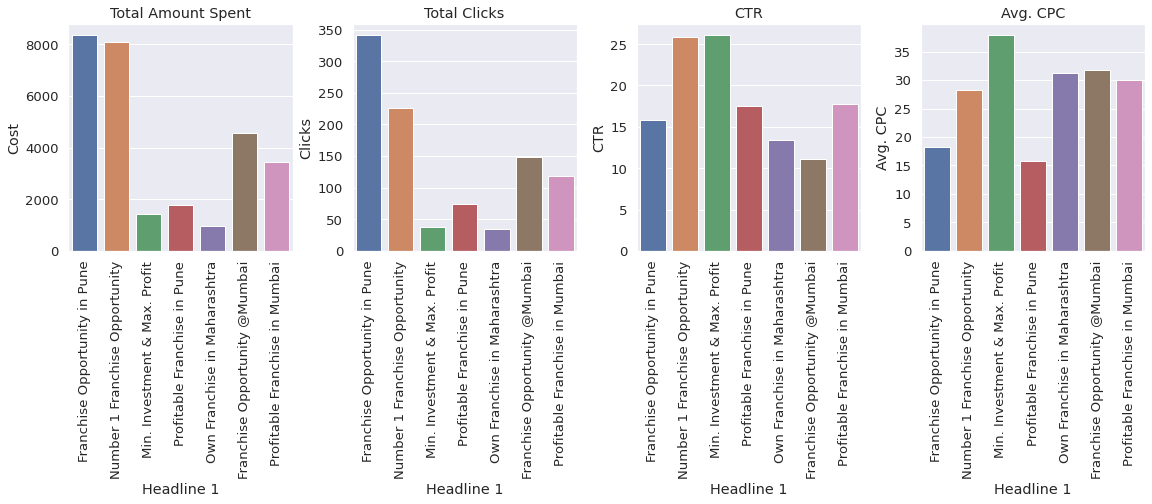

In [28]:
# increase figure size 
plt.figure(figsize=(16, 7))

# subplot 1
plt.subplot(1, 4, 1)
sns.barplot(x='Headline 1', y='Cost', data=data, estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 4, 2)
sns.barplot(x='Headline 1', y='Clicks', data=data, estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 4, 3)
sns.barplot(x='Headline 1', y='CTR', data=data, estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 4, 4)
sns.barplot(x='Headline 1', y='Avg. CPC', data=data, estimator=np.mean,ci=None)
plt.title("Avg. CPC")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()

## Let's Look at a Granular View

Effect on KPIs

Text(0.5, 0.98, 'Avg. Cost per Click of Each Ad')

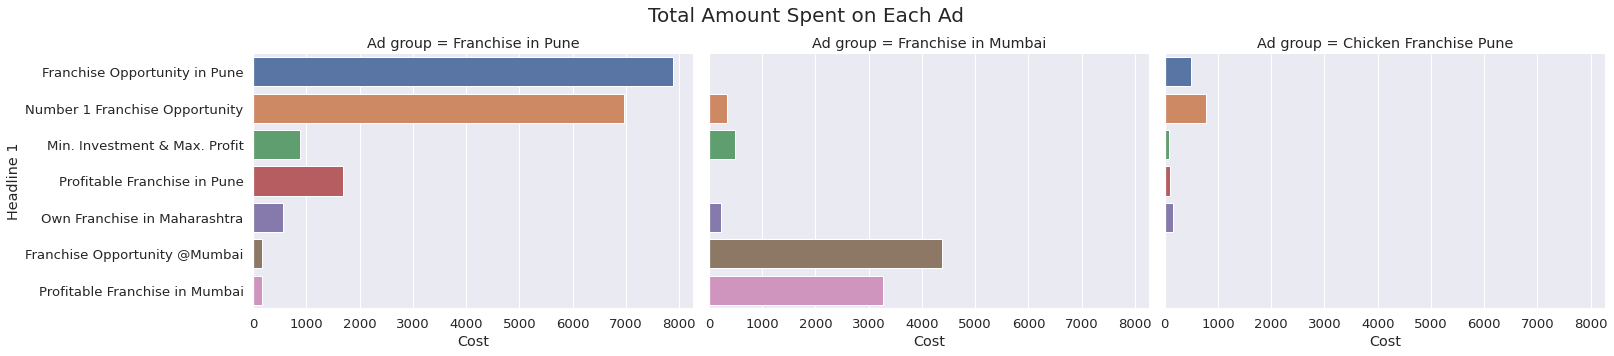

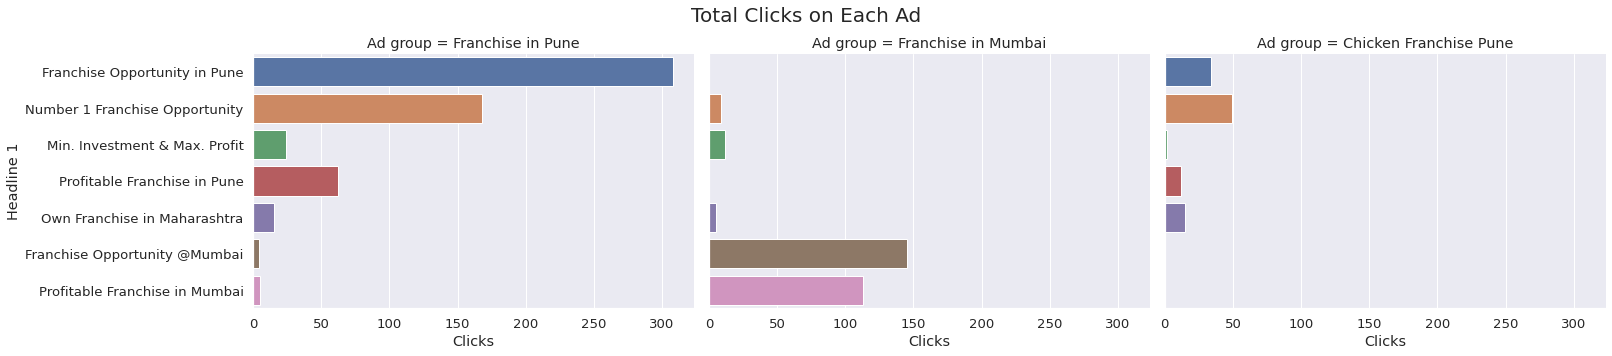

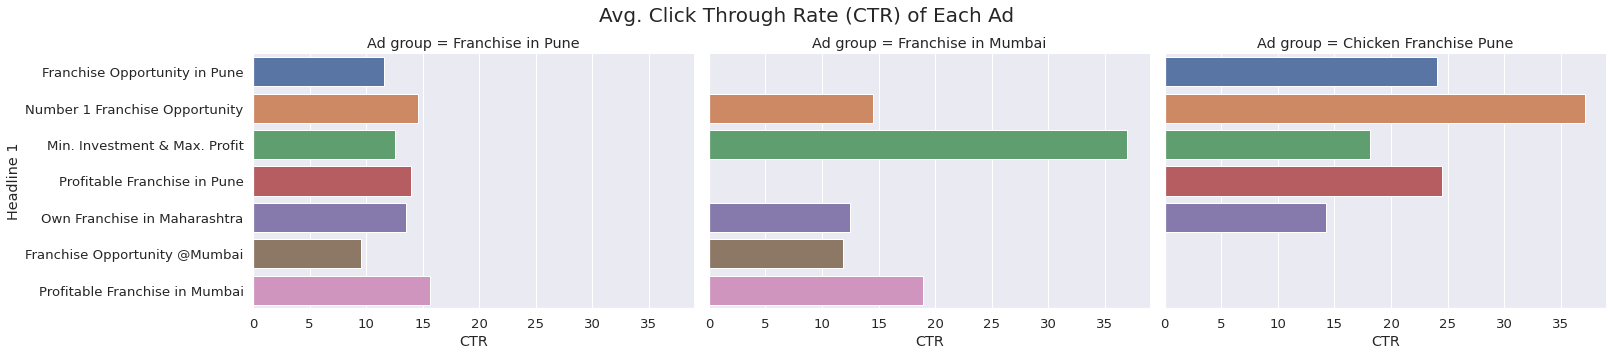

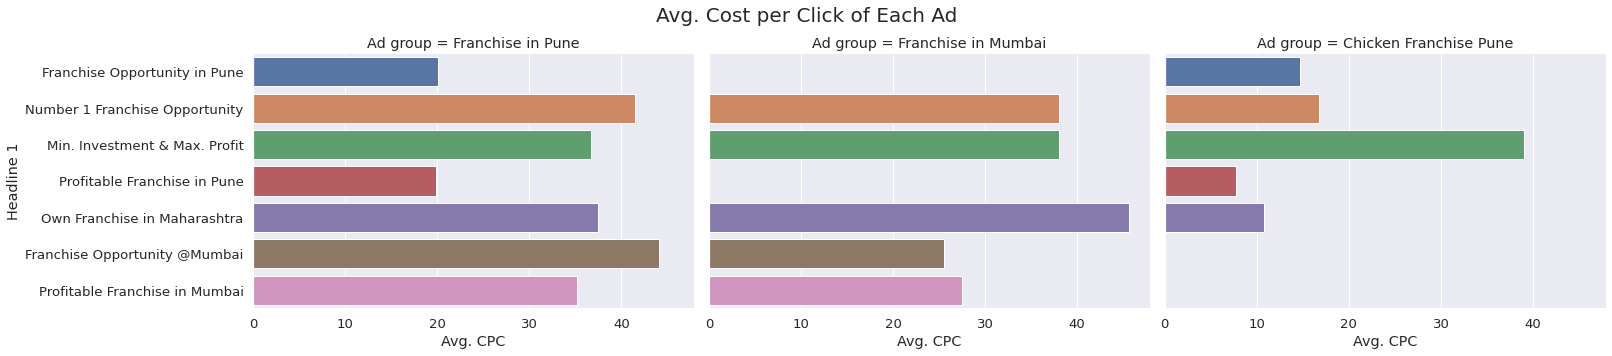

In [29]:
sns.catplot(y='Headline 1',x='Cost',col='Ad group',data=data,kind='bar',aspect=1.5, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Amount Spent on Each Ad',fontsize=20)

sns.catplot(y='Headline 1',x='Clicks',col='Ad group',data=data,kind='bar',aspect=1.5, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Clicks on Each Ad',fontsize=20)

sns.catplot(y='Headline 1',x='CTR',col='Ad group',data=data,kind='bar',aspect=1.5, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Click Through Rate (CTR) of Each Ad',fontsize=20)

sns.catplot(y='Headline 1',x='Avg. CPC',col='Ad group',data=data,kind='bar',aspect=1.5, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Cost per Click of Each Ad',fontsize=20)

### 2. Effect of Ad Group + Headline + Keyword Match Type on KPIs

### Generic View

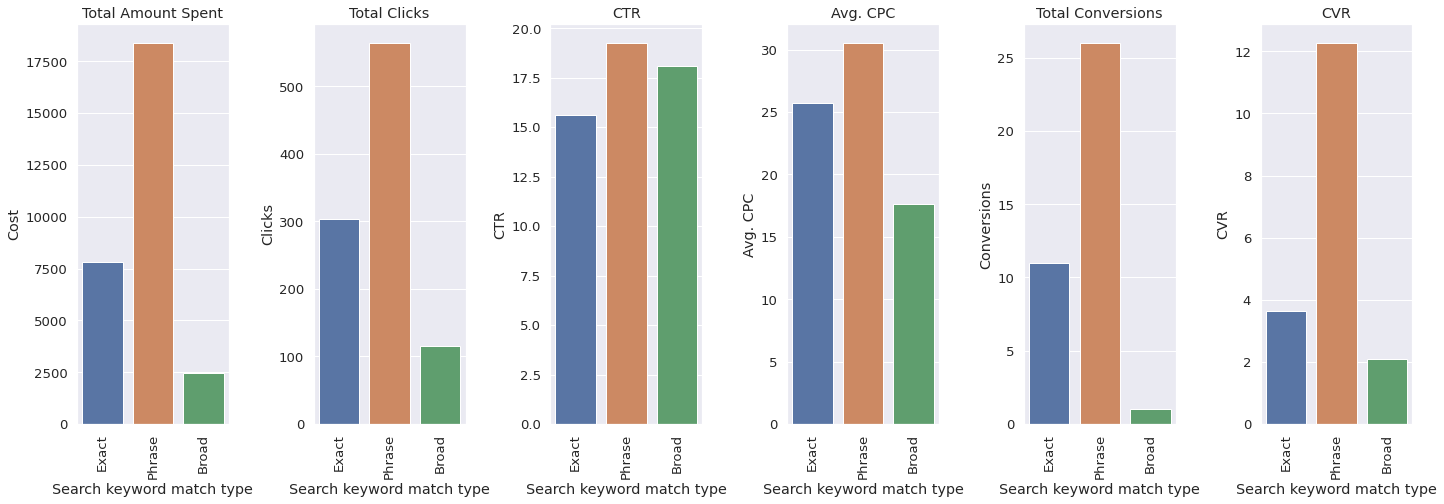

In [30]:
# increase figure size 
plt.figure(figsize=(20, 7))

# subplot 1
plt.subplot(1, 6, 1)
sns.barplot(x='Search keyword match type', y='Cost', data=data, estimator=np.sum,ci=None)
plt.title("Total Amount Spent")
plt.xticks(rotation=90)


# subplot 2
plt.subplot(1, 6, 2)
sns.barplot(x='Search keyword match type', y='Clicks', data=data, estimator=np.sum,ci=None)
plt.title("Total Clicks")
plt.xticks(rotation=90)

# subplot 3
plt.subplot(1, 6, 3)
sns.barplot(x='Search keyword match type', y='CTR', data=data, estimator=np.mean,ci=None)
plt.title("CTR")
plt.xticks(rotation=90)

# subplot 4
plt.subplot(1, 6, 4)
sns.barplot(x='Search keyword match type', y='Avg. CPC', data=data, estimator=np.mean,ci=None)
plt.title("Avg. CPC")
plt.xticks(rotation=90)

# subplot 5
plt.subplot(1, 6, 5)
sns.barplot(x='Search keyword match type', y='Conversions', data=data, estimator=np.sum,ci=None)
plt.title("Total Conversions")
plt.xticks(rotation=90)

# subplot 6
plt.subplot(1,6, 6)
sns.barplot(x='Search keyword match type', y='CVR', data=data, estimator=np.mean,ci=None)
plt.title("CVR")
plt.xticks(rotation=90)


plt.tight_layout(pad=0.7)
plt.show()

## Granular View

#### 1. Effect on  KPIs

Text(0.5, 0.98, 'Avg. Conversion Rate')

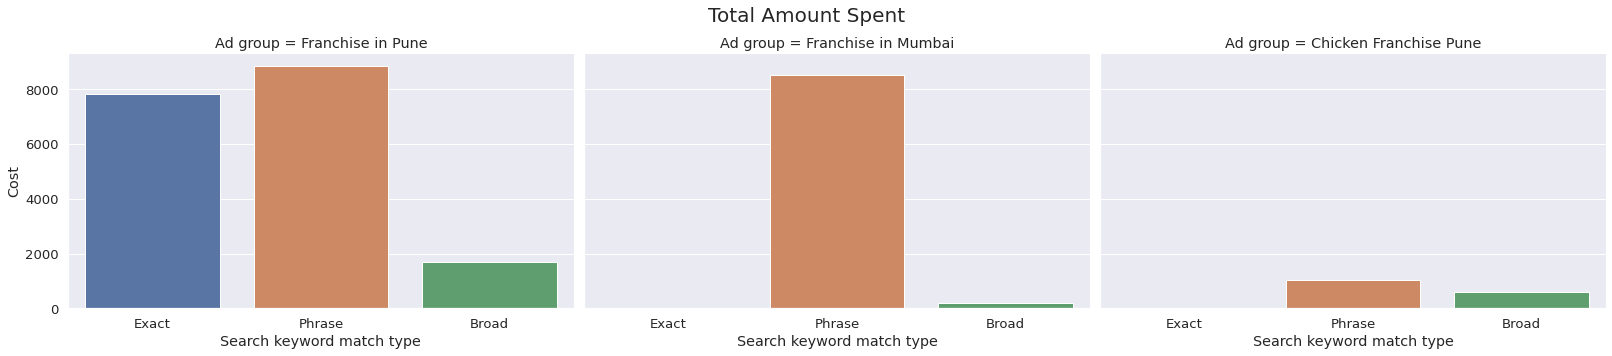

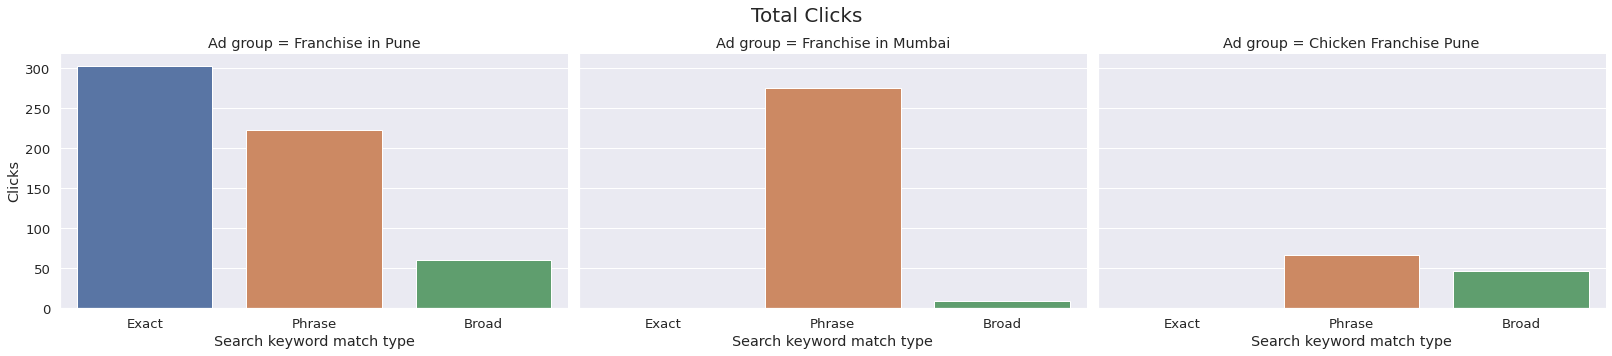

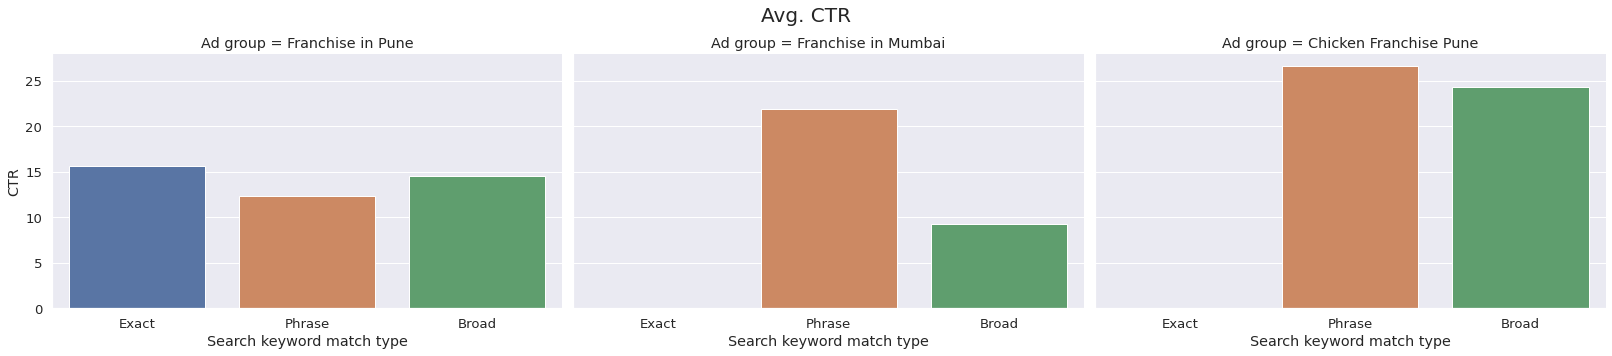

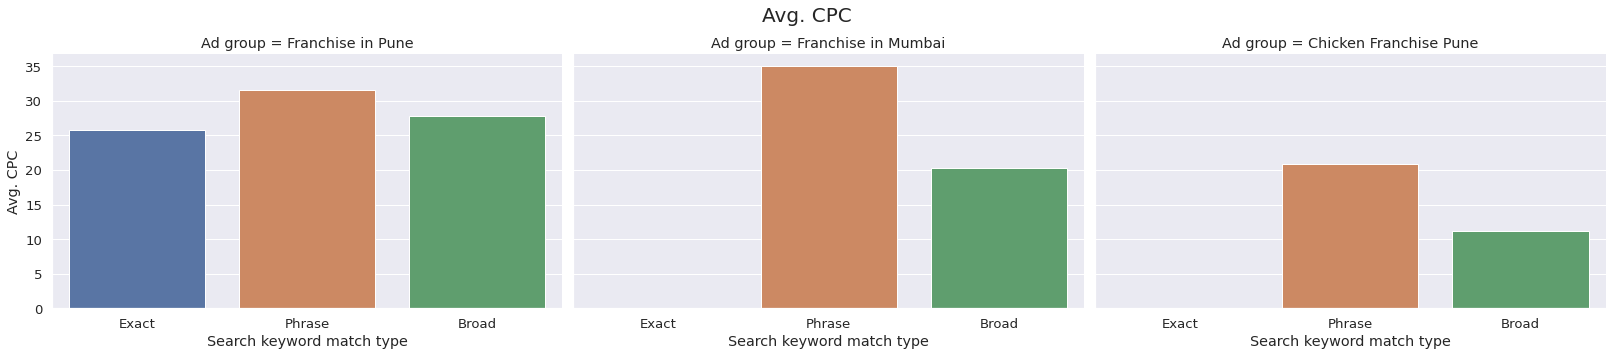

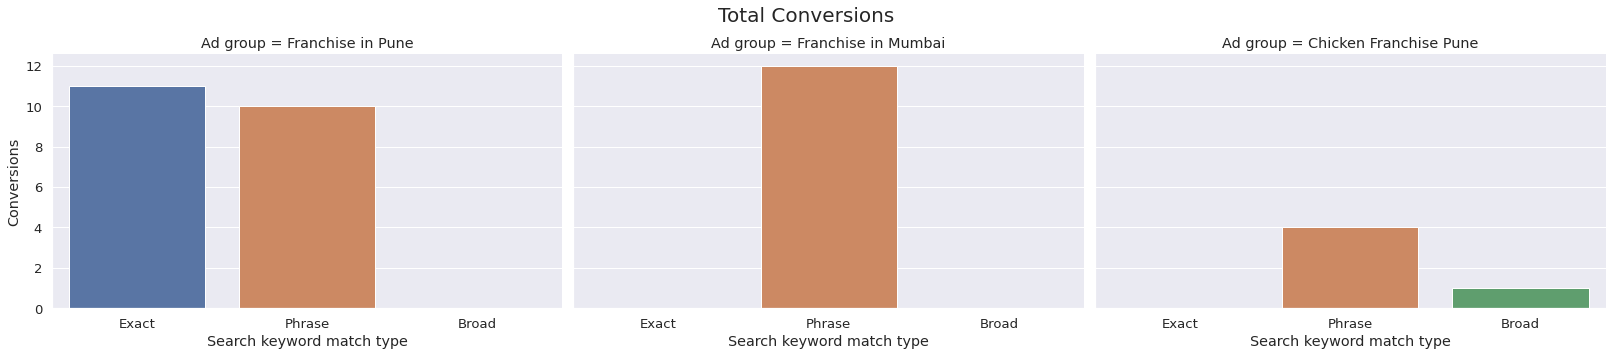

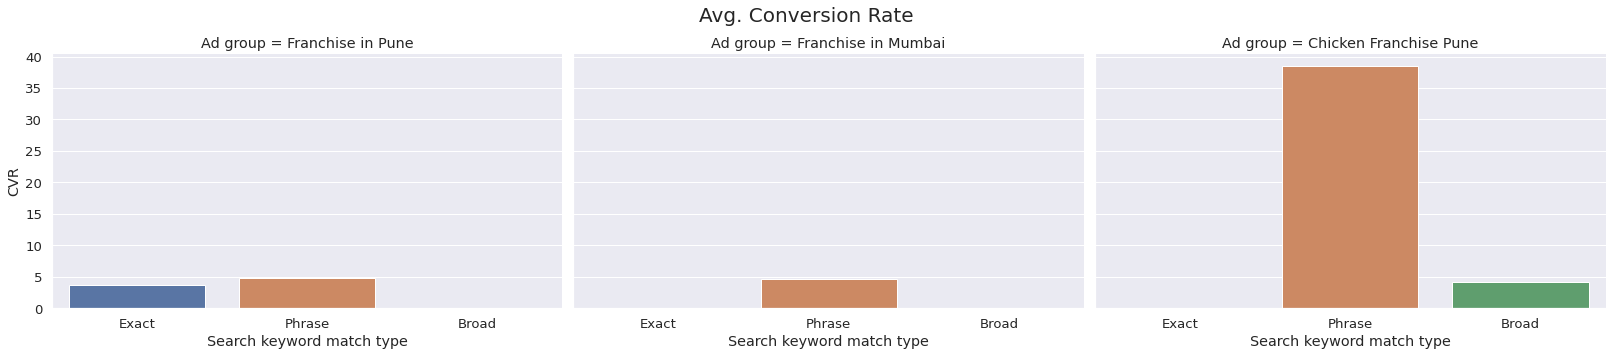

In [31]:
sns.catplot(x='Search keyword match type',y='Cost',col='Ad group',data=data,kind='bar',aspect=1.5, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Amount Spent',fontsize=20)

sns.catplot(x='Search keyword match type',y='Clicks',col='Ad group',data=data,kind='bar',aspect=1.5, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Clicks',fontsize=20)

sns.catplot(x='Search keyword match type',y='CTR',col='Ad group',data=data,kind='bar',aspect=1.5, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. CTR',fontsize=20)

sns.catplot(x='Search keyword match type',y='Avg. CPC',col='Ad group',data=data,kind='bar',aspect=1.5, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. CPC',fontsize=20)

sns.catplot(x='Search keyword match type',y='Conversions',col='Ad group',data=data,kind='bar',aspect=1.5, estimator=np.sum,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Total Conversions',fontsize=20)

sns.catplot(x='Search keyword match type',y='CVR',col='Ad group',data=data,kind='bar',aspect=1.5, estimator=np.mean,ci=None)
plt.subplots_adjust(top=0.85)
plt.suptitle('Avg. Conversion Rate',fontsize=20)